# Guided Capstone Step 3 Exploratory Data Analysis

This is the third step in the Data Science Method. We introduced this topic in the last subunit. With Data Wrangling out of the way we can progress to the Exploratory Data Analysis section. In this exercise, you will learn to build data profiles and plots, including relationship plot and data correlation plot. You will also implement k-means clustering, complete clusters, and update data frame as a CSV file. Let's get started! 
  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as we did in step 2 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
#load python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import os

**<font color='teal'> If you need to change your path refer back to step 2 on how to do that. Then load the csv file you created in step 2, remember it should be saved inside your data subfolder and print the first five rows.</font>**

In [2]:
os.getcwd()

'C:\\Users\\Bauyrjan.Jyenis'

In [3]:
path="C:\\Users\\Bauyrjan.Jyenis\\GuidedCapstone\\data"
os.chdir(path)

In [4]:
os.getcwd()

'C:\\Users\\Bauyrjan.Jyenis\\GuidedCapstone\\data'

In [5]:
os.listdir()

['clean_data.csv',
 'GuidedCapstone',
 'step2_output.csv',
 'updated_ski_data.csv']

In [6]:
# load the CSV file into a dataframe
df = pd.read_csv('step2_output.csv')

In [7]:
df.head()

,Unnamed: 0,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0
2,2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0
4,4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0.0,0,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         308 non-null    int64  
 1   Name               308 non-null    object 
 2   Region             308 non-null    object 
 3   state              308 non-null    object 
 4   summit_elev        308 non-null    int64  
 5   vertical_drop      308 non-null    int64  
 6   base_elev          308 non-null    int64  
 7   trams              308 non-null    int64  
 8   fastEight          308 non-null    float64
 9   fastSixes          308 non-null    int64  
 10  fastQuads          308 non-null    int64  
 11  quad               308 non-null    int64  
 12  triple             308 non-null    int64  
 13  double             308 non-null    int64  
 14  surface            308 non-null    int64  
 15  total_chairs       308 non-null    int64  
 16  Runs               308 non

# Build data profile tables and plots 

**<font color='teal'> Print out the summary stats table transposed to fit on the screen using the `describe()` function.</font>**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,308.0,164.538961,96.066829,0.0,80.75,165.500000,248.25,329.0
summit_elev,308.0,4700.506494,3744.666331,315.0,1473.75,3175.000000,8003.00,13150.0
vertical_drop,308.0,1253.003247,952.007170,60.0,496.25,1000.000000,1800.00,4425.0
base_elev,308.0,3450.064935,3134.119508,70.0,893.75,1600.000000,6412.50,10800.0
trams,308.0,0.185065,0.577683,0.0,0.00,0.000000,0.00,4.0
fastEight,308.0,0.003247,0.056980,0.0,0.00,0.000000,0.00,1.0
fastSixes,308.0,0.198052,0.672684,0.0,0.00,0.000000,0.00,6.0
fastQuads,308.0,1.087662,2.258991,0.0,0.00,0.000000,1.00,15.0
quad,308.0,0.980519,1.338339,0.0,0.00,0.500000,2.00,8.0
triple,308.0,1.571429,1.643691,0.0,0.00,1.000000,2.00,8.0


**<font color='teal'> Histograms are an excellent way to review the range and density of values for each numeric features in your data set and build data profiles. Plot the histograms for all numeric features and adjust the bins size to 25.</font>**

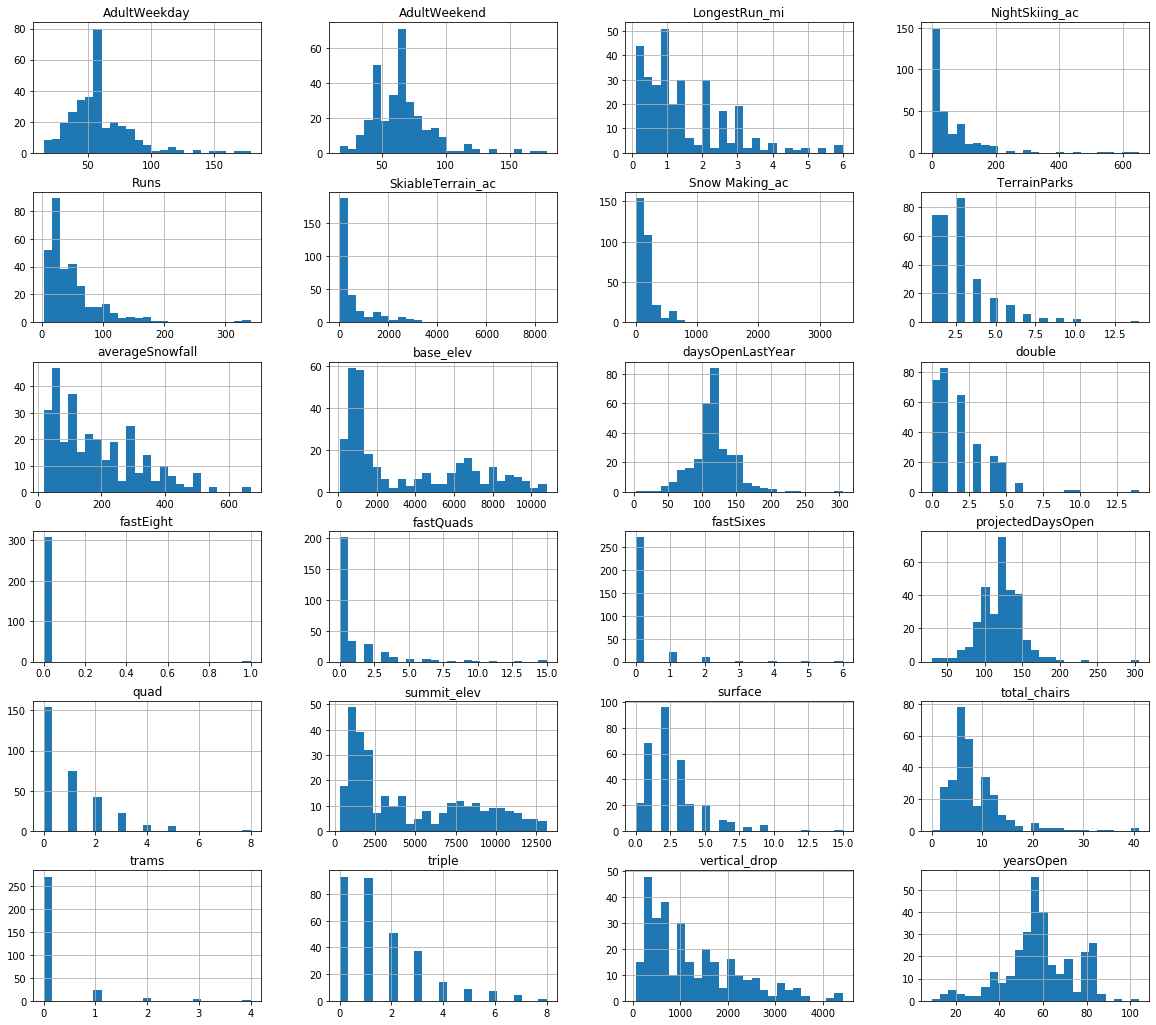

In [10]:
columns =['summit_elev', 'vertical_drop','base_elev', 'trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple', 
          'double', 'surface', 'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi', 'SkiableTerrain_ac', 
          'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekday', 'AdultWeekend', 
          'projectedDaysOpen', 'NightSkiing_ac']
df.hist(columns, bins=25, layout=(6,4), figsize=(20, 18))
plt.show()

Look for similarities in the features that may indicate that they are duplicates or highly correlated features. Make a note of your findings and any other interesting insights you find about these numeric features.

**<font color='teal'> Okay, now you should be getting a sense for what the data look like. Let's create a barplot for the categorical features `Region` and `state` where the heights of the bars are the counts of each level in that variable. </font>**

**<font color='teal'>State Levels Plot</font>**

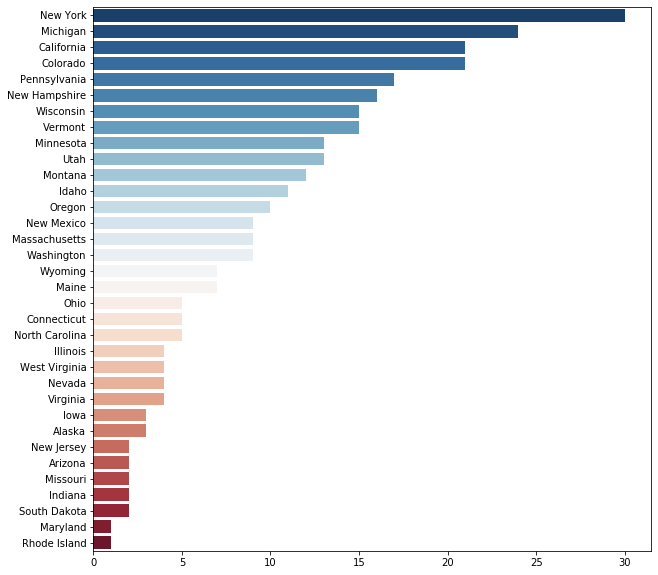

In [11]:
 f, ax = plt.subplots(figsize=(10, 10))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df.state.value_counts())

# Get the state names by calling list() on the x.index
names = list(x.index)

# Get the values by plugging x.state into the list() function
values = list(x.state)

# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r")

**<font color='teal'>Region Levels Plot</font>**

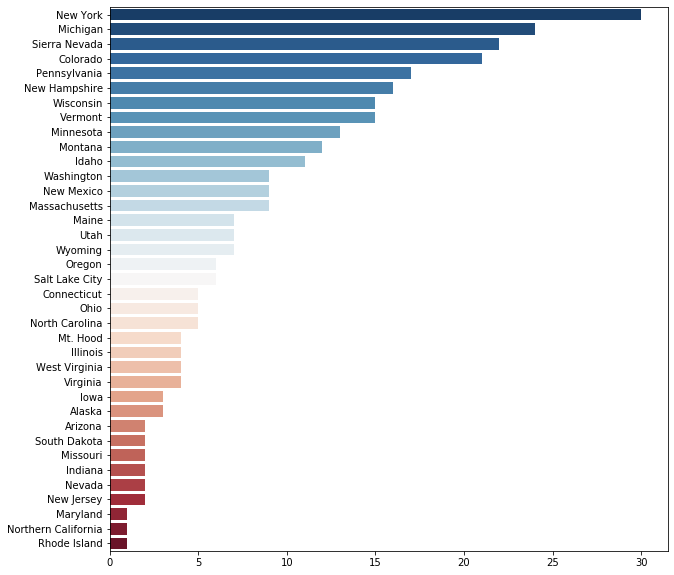

In [12]:
f, ax = plt.subplots(figsize=(10, 10))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df.Region.value_counts())

# Get the state names by calling list() on the x.index
names = list(x.index)

# Get the values by plugging x.state into the list() function
values = list(x.Region)

# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r")

By reviewing the State and Regions counts plots you should notice that the Region feature is nearly identical to the state and therfore we can remove from the dataframe.**<font color='teal'> Remove the `Region` column using the drop function.</font>**

In [13]:
del df['Region']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         308 non-null    int64  
 1   Name               308 non-null    object 
 2   state              308 non-null    object 
 3   summit_elev        308 non-null    int64  
 4   vertical_drop      308 non-null    int64  
 5   base_elev          308 non-null    int64  
 6   trams              308 non-null    int64  
 7   fastEight          308 non-null    float64
 8   fastSixes          308 non-null    int64  
 9   fastQuads          308 non-null    int64  
 10  quad               308 non-null    int64  
 11  triple             308 non-null    int64  
 12  double             308 non-null    int64  
 13  surface            308 non-null    int64  
 14  total_chairs       308 non-null    int64  
 15  Runs               308 non-null    float64
 16  TerrainParks       308 non

## Anamolies & Outliers - Review boxplots

**<font color='teal'> Print boxplot for every column</font>**

Hint: you'll see the methodology here in this article on Exploratory Data Analysis [here](nce-method-dsm-exploratory-data-analysis-bc84d4d8d3f9). 

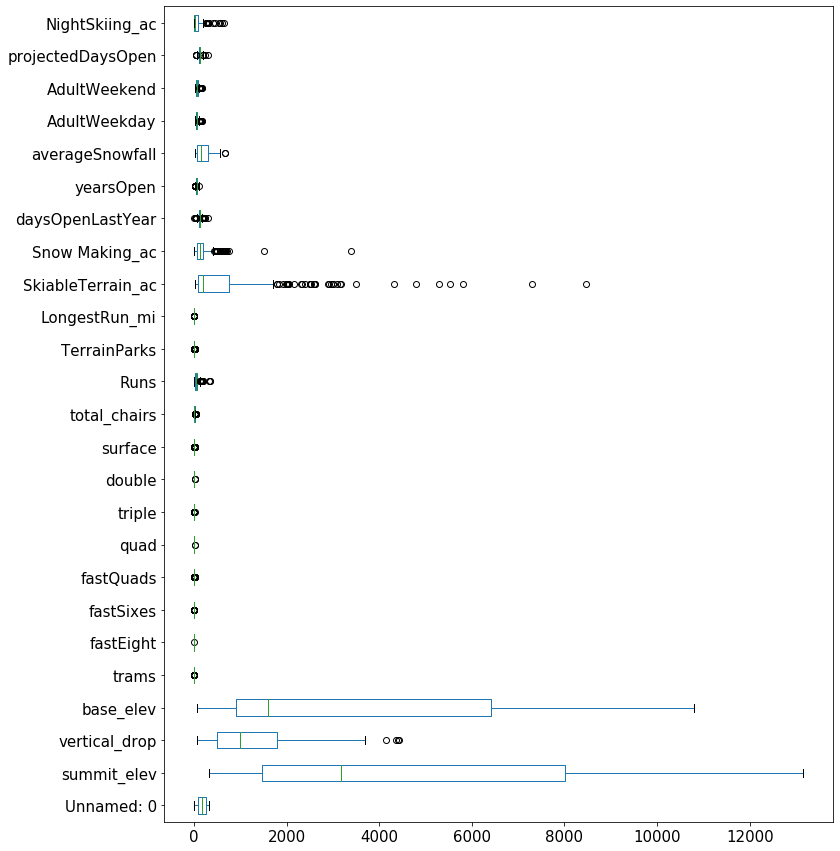

In [15]:
boxplots = df.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))

You need to create boxplots and  histograms to evaluate the data for potential outliers or data anomalies. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help you  interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They  can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations or artificial errors. 

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure below describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 

![](AnnotatedBoxplot.png)  
<font color='teal'>Follow these steps:  

1. Create boxplots - earlier step
2. Apply outlier removal using the Interquartile range or replacement 
3. Review how many observations were removed</font>

Hint: Recall from your statistics prework that a common definition of an outlier is an observation lying more than (1.5 * the Interquartile range) above the third quartile, or more than just that much below the first quartile.

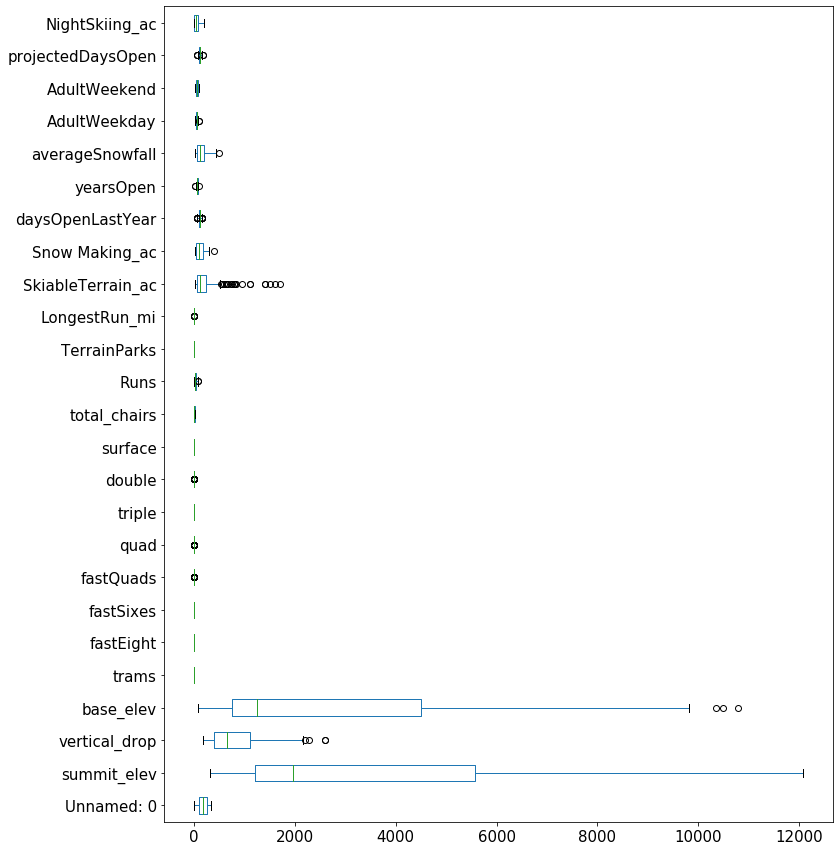

In [16]:
# Let's get the Interquartile range, or IQR. This is equal to Q3 - Q1. 
# First, let's use the quantile() method to get the first quartile, and store it in a variable called Q1.
# We'll want to plug 0.25 into the quantile method. 
Q1 = df.quantile(0.25)

# Now get Q3 and store in a variable called Q3. 
Q3 = df.quantile(0.75)

# Now calculate the IQR, storing it in a variable called IQR.
IQR = Q3 - Q1

# Make a variable called `dfno`, and assign it the value: df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]. 
# This filters on our existing dataframe, picking out just those observations that are NOT outliers. 
lower = (df < (Q1 - 1.5 * IQR))
upper = (df > (Q3 + 1.5 * IQR))
dfno = df[~(lower | upper).any(axis=1)]
# We now want to make a boxplot of this new dataframe dfno. 
df_no = dfno.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))

In [17]:
# Print the shapes of our dataframes df and dfno to compare the number of observations in each. 
print(df.shape)
print(dfno.shape)

(308, 27)
(175, 27)


There are many ways to discover and remove outliers, and what counts as a sensible way of doing so depends on your problem, your methodology for solving that problem, and the nature of your data. 

Each method will have its merits and demerits. As we can see, in this instance, we've lost a great many observations! 

There is no hard and fast rule as to which outlier removal method is best in all cases, and you will have to exercise your good judgement in arriving at an appropriate method for your problem at hand. We will cover outlier removal in more depth in units 7 (Data Wrangling) and 10 (Statistics for Exploratory Data Analysis) of the course. 

There are many possible response variables you could have identified in Step 1 of this guided capstone. However, for the rest of this guided capstone project, we will focus on increasing revenue by increasing the lift ticket prices and the number of days the resort is open per year. In this case, we need to investigate the expected lift ticket price for Big Mountain based on all the other given resort characteristics. In addition, we want to predict the number of days the resort will be open each season.

<font color='teal'>**Review the `AdultWeekday`,`AdultWeekend` response variable distributions**</font>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1F55F4048>]],
      dtype=object)

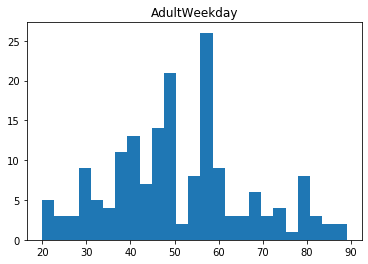

In [83]:
# Make a histogram of the 'AdultWeekday' column of the dfno dataframe.
dfno.hist('AdultWeekday', bins=25, grid=False)
# You'll want to call hist() on that column 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1F4DD3BC8>]],
      dtype=object)

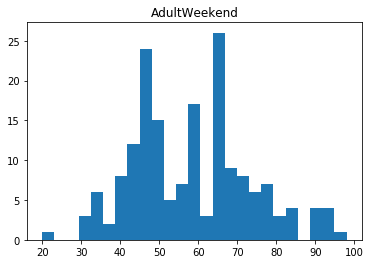

In [84]:
# Do the same but with the AdultWeekend column 
dfno.hist('AdultWeekend', bins=25, grid=False)

<font color='teal'>**Review the `daysOpenLastYear`,`projecteDaysOpen` response variable distributions**</font>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1F46F7F08>]],
      dtype=object)

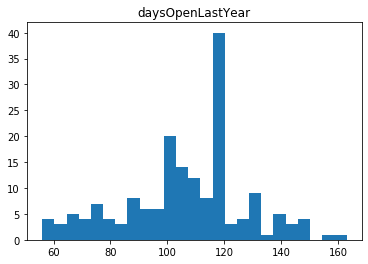

In [85]:
# Do the same as above! You got this :) 
dfno.hist('daysOpenLastYear', bins=25, grid=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1F5CF2308>]],
      dtype=object)

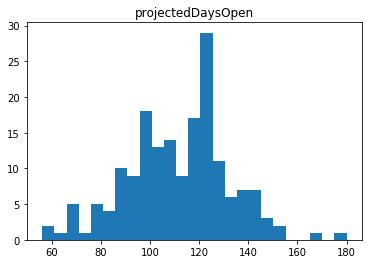

In [86]:
dfno.hist('projectedDaysOpen', bins=25, grid=False)

After reviewing these respons varible distributions, there doesn't appear to be any data issues to mitigate. Now, we move on to investigating feature relationship and interactions between the features the response.

# Explore data relationships

<font color='teal'>**Create pairplots or what is commonly referred to as biplots**</font>

Hint: pairplots are covered in this article on EDA [here](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-exploratory-data-analysis-bc84d4d8d3f9). 

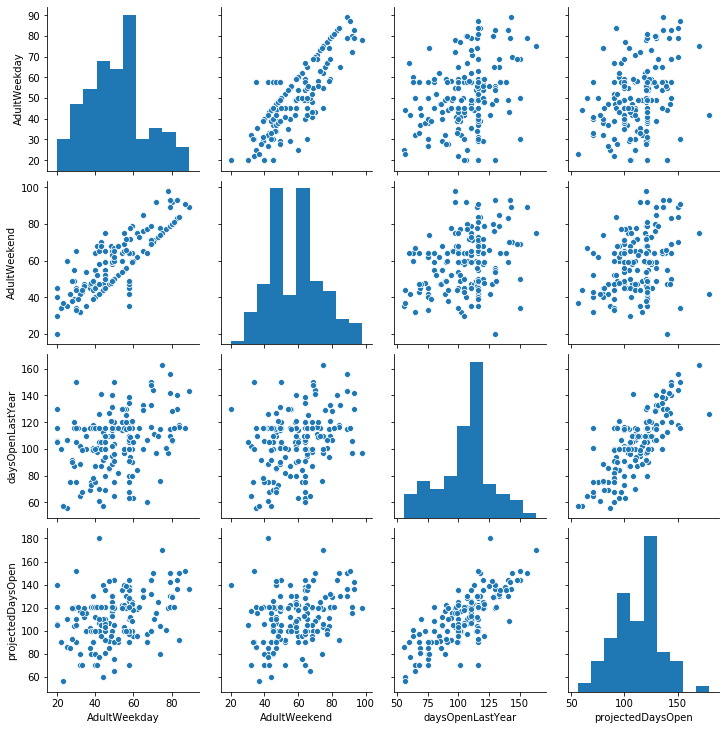

In [89]:
g = sns.pairplot(dfno[['AdultWeekday', 'AdultWeekend', 'daysOpenLastYear', 'projectedDaysOpen']])

# Identification and creation of features

<font color='teal'>**Create a Pearson correlation heatmap**</font>

In [21]:
#Calculate the correlation coefficients
corr = df.corr()
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

,Unnamed: 0,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
Unnamed: 0,1.000000,-0.220000,-0.090000,-0.230000,-0.070000,-0.010000,-0.050000,-0.120000,0.090000,-0.100000,-0.050000,-0.170000,-0.140000,-0.110000,-0.080000,-0.090000,-0.130000,-0.150000,-0.170000,-0.040000,-0.090000,-0.020000,0.010000,-0.150000,0.080000
summit_elev,-0.220000,1.000000,0.730000,0.980000,0.350000,0.100000,0.270000,0.450000,-0.020000,0.180000,0.100000,-0.010000,0.310000,0.570000,0.180000,0.540000,0.610000,0.310000,0.430000,0.180000,0.700000,0.460000,0.370000,0.390000,-0.190000
vertical_drop,-0.090000,0.730000,1.000000,0.570000,0.600000,0.190000,0.380000,0.690000,0.130000,0.260000,0.170000,0.120000,0.560000,0.800000,0.340000,0.770000,0.740000,0.470000,0.540000,0.150000,0.670000,0.620000,0.580000,0.510000,-0.110000
base_elev,-0.230000,0.980000,0.570000,1.000000,0.230000,0.070000,0.210000,0.340000,-0.070000,0.140000,0.080000,-0.050000,0.210000,0.450000,0.110000,0.420000,0.510000,0.240000,0.350000,0.170000,0.640000,0.360000,0.270000,0.330000,-0.200000
trams,-0.070000,0.350000,0.600000,0.230000,1.000000,0.080000,0.530000,0.660000,0.220000,0.260000,0.070000,0.280000,0.650000,0.690000,0.330000,0.570000,0.590000,0.540000,0.360000,0.030000,0.300000,0.410000,0.410000,0.210000,-0.110000
fastEight,-0.010000,0.100000,0.190000,0.070000,0.080000,1.000000,0.150000,0.100000,0.090000,0.190000,0.100000,0.260000,0.270000,0.320000,0.160000,0.220000,0.260000,0.050000,0.050000,-0.050000,0.090000,-0.000000,-0.000000,0.050000,-0.040000
fastSixes,-0.050000,0.270000,0.380000,0.210000,0.530000,0.150000,1.000000,0.440000,0.110000,0.260000,0.110000,0.380000,0.600000,0.550000,0.340000,0.370000,0.510000,0.410000,0.270000,0.020000,0.180000,0.210000,0.220000,0.200000,-0.080000
fastQuads,-0.120000,0.450000,0.690000,0.340000,0.660000,0.100000,0.440000,1.000000,0.140000,0.280000,0.090000,0.350000,0.760000,0.750000,0.440000,0.580000,0.690000,0.520000,0.450000,0.040000,0.400000,0.530000,0.530000,0.370000,-0.030000
quad,0.090000,-0.020000,0.130000,-0.070000,0.220000,0.090000,0.110000,0.140000,1.000000,0.120000,-0.130000,0.130000,0.350000,0.290000,0.250000,0.190000,0.150000,0.190000,0.190000,0.040000,0.080000,0.240000,0.300000,0.200000,0.170000
triple,-0.100000,0.180000,0.260000,0.140000,0.260000,0.190000,0.260000,0.280000,0.120000,1.000000,-0.040000,0.190000,0.530000,0.360000,0.360000,0.250000,0.290000,0.290000,0.180000,0.060000,0.120000,0.260000,0.300000,0.160000,0.100000


When reviewing the Pearson correlation coefficient heatmap, you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from multi-collinearity. 

<font color='teal'>**Use the correlation matrix displayed in the heatmap to select and remove collinear features. Remember to exclude the response variable(s) from the matrix to ensure they are retained in your final model development dataset. Then select those features that are more than 95% correlated for removal.**</font>

Step 1: Create a correlation matrix that excludes your response variables. 

Step 2: Select the upper triangle of the correlation matrix. This is because a correlation matrix actually contains the same information, twice over!

Step 3: Find the index of feature columns with a correlation greater than 0.95.

In [25]:
# Step 1. Call the variable corr_matrix
corr_matrix = dfno.drop(['AdultWeekday','AdultWeekend','daysOpenLastYear','projectedDaysOpen'], axis=1).corr().abs()

# Step 2. Get the upper triangle of the correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Step 3. This code iterates through our columns and gets the index of any that have a correlation > 0.95
# Call the variable to_drop, get the columns of our 'upper' variable, make sure the threshold is 0.95.
to_drop = [column for column in corr_matrix.columns if any(upper[column] > 0.95)]

In [26]:
# Let's see those features! 
print('Features selected to drop include:',to_drop)

Features selected to drop include: ['base_elev']


In [27]:
print('Reduced dataframe size: ',dfno.drop(dfno[to_drop], axis=1).shape)

Reduced dataframe size:  (175, 26)


In [28]:
# Now replace dfno by the result of dropping the columns in the to_drop variable from it
dfno=dfno.drop(dfno[to_drop], axis=1)

Now we address the feature creation piece of this step. We can create additional features through many methods such as: combining several features, grouping features into bins, or even by applying an unsupervised classification algorithm, such as k-means clustering and using the clusters as features in our model development dataset.

Clustering essentially finds patterns in data when we don't know in advance what we're looking for. The K-means algorithm is one way of doing clustering. It puts our data into groups (or 'clusters') which can then become features for further analysis. What the k-means algorithm outputs, though, depends on the number of clusters we set out to have. We will use a method called 'Elbow plotting' to determine this number. 

We will cover clustering and k-means thoroughly in the Unsupervised Learning unit of this course, but for now, we'll use it for feature creation alone, which is an integral part of Exploratory Data Analysis. Don't worry if you don't understand the details just yet. 

Run the next two cells below to create an Elbow plot. The Elbow plot is a diagnostic tool that helps us determine the number of clusters to include in our k-means clustering implementation. 

In this example, the error between clusters and within clusters is compared for a range of 1 to 11 clusters, and it appears the elbow is between two and four, therefore we set the parameter k = 3.

In [42]:
from sklearn.cluster import KMeans
x = dfno.drop(['Name','state'], axis =1).values

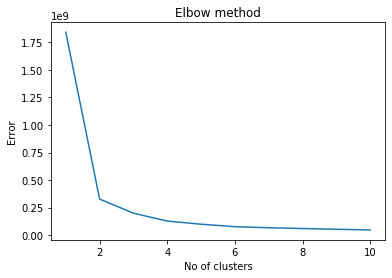

In [46]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

<font color='teal'>**Fit the kmeans algorithm with the k parameter set to three and plot the results.**</font>

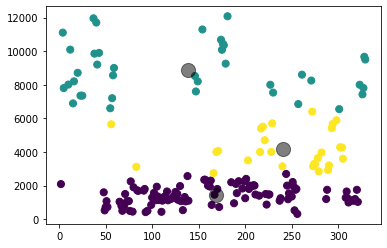

In [47]:
# This code will fit the k-means algorithm with our k parameter set to three, and plot the results. Cool, huh? 
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


<font color='teal'>**Add the clusters to your dataframe as a new column to include in the next step and write the updated dataframe out as csv. Save the dataframe in the data folder and name it `step3_output.csv`.**</font>

In [49]:
# Make a new column in your dfno dataframe called 'clusters', and assign it the variable: y_kmeans3
dfno['clusters'] = y_kmeans3

In [50]:
os.getcwd()

'C:\\Users\\Bauyrjan.Jyenis\\GuidedCapstone\\data'

In [51]:
# Write your dataframe to csv 
dfno.to_csv('step3_output.csv')

In [52]:
dfno.head()

,Unnamed: 0,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
2,2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,...,30.0,30.000000,150.000000,36.0,69.0,30.000000,34.00000,152.0,30.0,0
4,4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,...,800.0,80.000000,115.000000,49.0,250.0,74.000000,78.00000,104.0,80.0,1
5,5,Yosemite Ski & Snowboard Area,California,7800,600,0,0.0,0,0,0,...,88.0,180.073529,110.000000,84.0,300.0,47.000000,47.00000,107.0,0.0,1
10,10,Donner Ski Ranch,California,8012,750,0,0.0,0,0,0,...,505.0,60.000000,163.000000,82.0,400.0,75.000000,75.00000,170.0,0.0,1
12,12,June Mountain,California,10090,2590,0,0.0,0,2,0,...,1500.0,180.073529,115.985185,58.0,250.0,57.916957,64.16681,128.0,0.0,1
